# Analyze the Forest Fires data

## Read the data

In [1]:
import pandas as pd

In [2]:
fires_by_month = pd.read_pickle('fires_by_month.pkl')

In [3]:
# display the first five rows
fires_by_month.head(5)

,state,fire_year,fire_month,acres_burned,days_burning,fire_count
0,AK,1992,5,4202.0,135.0,14
1,AK,1992,6,86401.0,417.0,23
2,AK,1992,7,48516.7,500.0,26
3,AK,1992,8,3305.0,92.0,4
4,AK,1992,9,20.0,1.0,1


## Group and aggregate the data

In [4]:
# group the data by state and year

group_data=fires_by_month.groupby(['state','fire_year'])
group_data

In [5]:
# sum the grouped data and store DataFrame in fires_by_year variable

fires_by_year=group_data.sum()
fires_by_year

fire_month  acres_burned  days_burning  fire_count
state fire_year                                                    
AK    1992               35     142444.70        1145.0          68
      1993               30     686630.50        3373.0         144
      1994               48     261604.70        2517.0         126
      1995               41      43762.60         880.0          48
      1996               40     598407.20        2112.0          88
...                     ...           ...           ...         ...
WY    2011               77     134336.25         669.0         160
      2012               66     481206.46        1802.0         215
      2013               52      53884.90         742.0          40
      2014               75       7179.43         224.0          48
      2015               77      36233.50         351.0         107

[1224 rows x 4 columns]

In [6]:
# drop the fire_month column

fires_by_year=fires_by_year.drop(columns='fire_month')
fires_by_year

acres_burned  days_burning  fire_count
state fire_year                                        
AK    1992          142444.70        1145.0          68
      1993          686630.50        3373.0         144
      1994          261604.70        2517.0         126
      1995           43762.60         880.0          48
      1996          598407.20        2112.0          88
...                       ...           ...         ...
WY    2011          134336.25         669.0         160
      2012          481206.46        1802.0         215
      2013           53884.90         742.0          40
      2014            7179.43         224.0          48
      2015           36233.50         351.0         107

[1224 rows x 3 columns]

## Use pivot tables

In [7]:
# select rows where the year is 2013 or later

fires_by_year_filtered=fires_by_year.query('fire_year >= 2013').reset_index()
fires_by_year_filtered

,state,fire_year,acres_burned,days_burning,fire_count
0,AK,2013,1320518.50,4644.0,153
1,AK,2014,233426.40,571.0,43
2,AK,2015,5136372.99,16636.0,340
3,AL,2013,28015.65,115.0,581
4,AL,2014,35310.20,107.0,758
...,...,...,...,...,...
148,WV,2014,12547.50,75.0,172
149,WV,2015,16479.77,80.0,141
150,WY,2013,53884.90,742.0,40
151,WY,2014,7179.43,224.0,48


In [8]:
# use the pivot() method to pivot the data so the state values are used as row labels, 
# fire_year values are used as column labels, and acres_burned values are used as data

fires_by_year_filtered.pivot(index='state',columns='fire_year',values='acres_burned')

fire_year,2013,2014,2015
state,,,
AK,1320518.500,233426.400000,5136372.99
AL,28015.650,35310.200000,28386.96
AR,11797.600,18521.800000,16302.96
AZ,102307.470,202212.510000,154720.38
CA,575555.650,543033.330000,844674.02
CO,161037.700,24488.270000,22599.10
CT,0.000,0.000000,108.70
DE,12.000,0.000000,56.00
FL,74046.020,153560.600000,162845.80


<AxesSubplot:xlabel='state'>

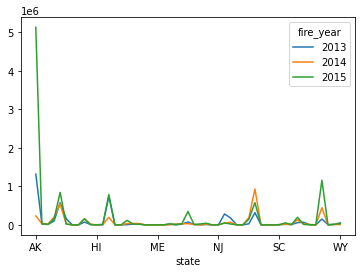

In [9]:
fires_by_year_filtered.pivot(index='state',columns='fire_year',values='acres_burned').plot()

In [10]:
# use the pivot_table() method with the fires_by_month DataFrame to get the same result
# as the previous cell

fires_by_month_filtered=fires_by_month.query('fire_year >= 2013')

fires_by_month_filtered.pivot_table(index='state',columns='fire_year',values='acres_burned',\
                                   aggfunc='sum')



fire_year,2013,2014,2015
state,,,
AK,1320518.500,233426.400000,5136372.99
AL,28015.650,35310.200000,28386.96
AR,11797.600,18521.800000,16302.96
AZ,102307.470,202212.510000,154720.38
CA,575555.650,543033.330000,844674.02
CO,161037.700,24488.270000,22599.10
CT,0.000,0.000000,108.70
DE,12.000,0.000000,56.00
FL,74046.020,153560.600000,162845.80


<AxesSubplot:xlabel='state'>

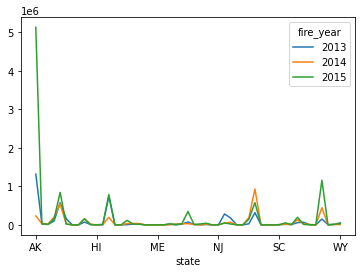

In [11]:
fires_by_month_filtered.pivot_table(index='state',columns='fire_year',values='acres_burned',\
                                   aggfunc='sum').plot()

## Work with bins

In [12]:
# reset the index for the DataFrame named fires_by_year

fires_by_year.reset_index(inplace=True)
fires_by_year

,state,fire_year,acres_burned,days_burning,fire_count
0,AK,1992,142444.70,1145.0,68
1,AK,1993,686630.50,3373.0,144
2,AK,1994,261604.70,2517.0,126
3,AK,1995,43762.60,880.0,48
4,AK,1996,598407.20,2112.0,88
...,...,...,...,...,...
1219,WY,2011,134336.25,669.0,160
1220,WY,2012,481206.46,1802.0,215
1221,WY,2013,53884.90,742.0,40
1222,WY,2014,7179.43,224.0,48


In [13]:
#pd.cut(fires_by_year.fire_year,bins=6) -> for my understanding

In [14]:
# bin the data by decade

# Different ways to bin the data by decade

#fires_by_year['decade']=pd.cut(fires_by_year.fire_year,bins=[1990,1999,2007,2015],labels=['1990-1999','1999-2007','2007-2015'])
#fires_by_year['decade']=pd.qcut(fires_by_year.fire_year,q=3,labels=['1990s','2000s','2010s'])

fires_by_year['decade']=pd.cut(fires_by_year.fire_year,bins=3,labels=['1990-1999','1999-2007','2007-2015'])
fires_by_year

,state,fire_year,acres_burned,days_burning,fire_count,decade
0,AK,1992,142444.70,1145.0,68,1990-1999
1,AK,1993,686630.50,3373.0,144,1990-1999
2,AK,1994,261604.70,2517.0,126,1990-1999
3,AK,1995,43762.60,880.0,48,1990-1999
4,AK,1996,598407.20,2112.0,88,1990-1999
...,...,...,...,...,...,...
1219,WY,2011,134336.25,669.0,160,2007-2015
1220,WY,2012,481206.46,1802.0,215,2007-2015
1221,WY,2013,53884.90,742.0,40,2007-2015
1222,WY,2014,7179.43,224.0,48,2007-2015


In [15]:
# double-check the edge values

#fires_by_year['decade']=pd.qcut(fires_by_year.fire_year,q=4,labels=['1990s','2000s','2010s','2020s'])
#fires_by_year['decade']=pd.cut(fires_by_year.fire_year,bins=[1990,1997,2003,2009,2015],labels=['1990-1997','1997-2003','2003-2009','2009-2015'])

fires_by_year['decade']=pd.cut(fires_by_year.fire_year,bins=6,labels=['1990-1996','1996-2000','2000-2004','2004-2008','2008-2012','2012-2015'])
fires_by_year

,state,fire_year,acres_burned,days_burning,fire_count,decade
0,AK,1992,142444.70,1145.0,68,1990-1996
1,AK,1993,686630.50,3373.0,144,1990-1996
2,AK,1994,261604.70,2517.0,126,1990-1996
3,AK,1995,43762.60,880.0,48,1990-1996
4,AK,1996,598407.20,2112.0,88,1996-2000
...,...,...,...,...,...,...
1219,WY,2011,134336.25,669.0,160,2008-2012
1220,WY,2012,481206.46,1802.0,215,2012-2015
1221,WY,2013,53884.90,742.0,40,2012-2015
1222,WY,2014,7179.43,224.0,48,2012-2015


In [16]:
# drop the fire_year column and assign the DataFrame that's returned to a variable named fires_by_decade

fires_by_decade=fires_by_year.drop(columns='fire_year')
fires_by_decade

,state,acres_burned,days_burning,fire_count,decade
0,AK,142444.70,1145.0,68,1990-1996
1,AK,686630.50,3373.0,144,1990-1996
2,AK,261604.70,2517.0,126,1990-1996
3,AK,43762.60,880.0,48,1990-1996
4,AK,598407.20,2112.0,88,1996-2000
...,...,...,...,...,...
1219,WY,134336.25,669.0,160,2008-2012
1220,WY,481206.46,1802.0,215,2012-2015
1221,WY,53884.90,742.0,40,2012-2015
1222,WY,7179.43,224.0,48,2012-2015


In [17]:
# group by the state and decade columns and sum the data

changed_fires_by_decade=fires_by_decade.groupby(['state','decade']).sum()
changed_fires_by_decade

acres_burned  days_burning  fire_count
state decade                                           
AK    1990-1996  1.134442e+06        7915.0         386
      1996-2000  3.750426e+06        7154.0         348
      2000-2004  3.763598e+06        7672.0         233
      2004-2008  1.211547e+07       19418.0         541
      2008-2012  4.471412e+06       14993.0         484
...                       ...           ...         ...
WY    1996-2000  3.213716e+05         382.0         248
      2000-2004  6.583384e+05        3785.0         387
      2004-2008  3.831751e+05        2835.0         264
      2008-2012  3.460670e+05        4633.0         346
      2012-2015  5.785043e+05        3119.0         410

[306 rows x 3 columns]